In [1]:
#Nilava Metya
#nm8188@princeton.edu
#ORF 523
#Python 3

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
image = Image.open('conway.jpg')
A = np.array(image, dtype=float) / 255.0 
A = np.dot(A, [0.2989, 0.5870, 0.1140])
m,n = A.shape

In [4]:
U, S, Vt = np.linalg.svd(A)                         #do the SVD
K = [40,80,120,160]                                 #storing values of k
l = len(K)
S = np.diag(S)                                      #original S is only a linear array, need to convert to matrix

In [5]:
approx = []
for i in range(l):
    approx.append(U[:, :K[i]] @ S[:K[i], :K[i]] @ Vt[:K[i], :])             #taking approximations

In [6]:
#obtaining and printing a table for Frobeius norm of differences
error = [0 for _ in range(l)]
print("k\t|\tFrobenius norm")
print("--------+--------------------------")
for i in range(len(K)):
    error[i] = np.linalg.norm(A-approx[i])
    print(str(K[i])+"\t|\t"+str(error[i]))

k	|	Frobenius norm
--------+--------------------------
40	|	31.733288485394482
80	|	19.016427727768185
120	|	13.055854194249326
160	|	9.511015173570117


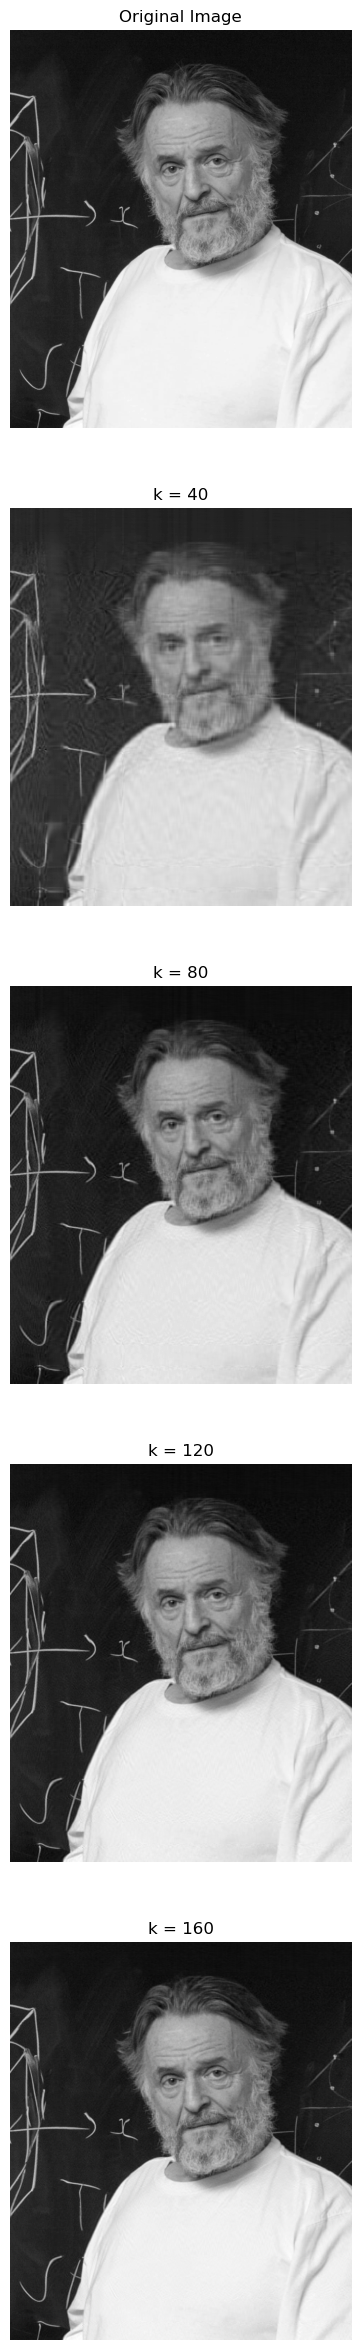

In [7]:
fig, ax = plt.subplots(len(K)+1, 1, figsize = (10, 30))

ax[0].set_title("Original Image")
ax[0].imshow(A, cmap = 'gray')
ax[0].axis('off')

for i in range(l):
    ax[i+1].imshow(approx[i], cmap = 'gray')
    ax[i+1].set_title("k = " + str(K[i]))
    ax[i+1].axis('off')

plt.show()

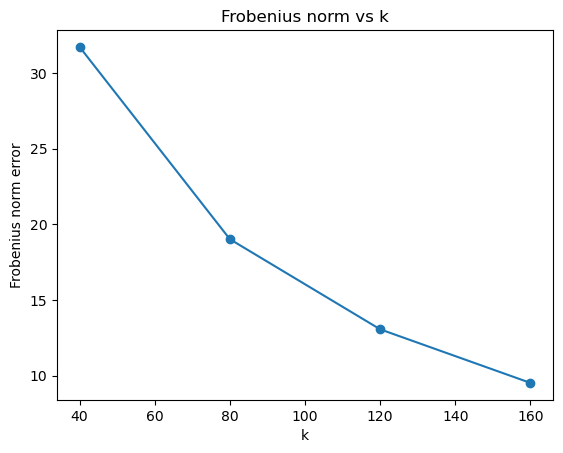

In [8]:
plt.plot(K, error, marker = 'o')
plt.xlabel('k')
plt.ylabel('Frobenius norm error')
plt.title("Frobenius norm vs k")
plt.show()

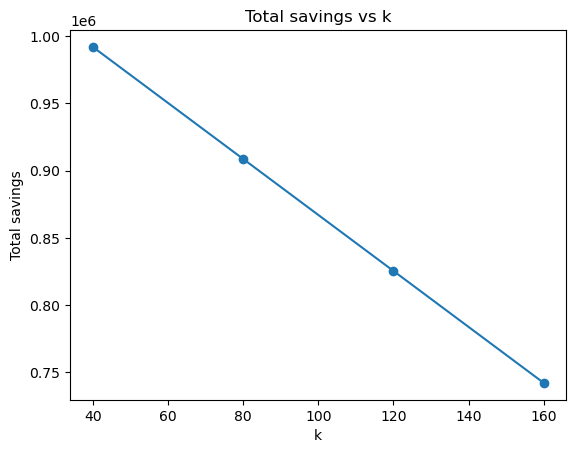

In [9]:
plt.plot(K, [m*n-(m+n+1)*k for k in K], marker = 'o')
plt.xlabel('k')
plt.ylabel('Total savings')
plt.title("Total savings vs k")
plt.show()